In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# for manipulations
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactivity
import ipywidgets
from ipywidgets import interact

### Reading the Dataset


In [3]:
# Lets read the dataset
#data = pd.read_csv('/content/drive/MyDrive/Google Colab/Capstone Projects/Optimising Agricultural Production/data.csv')

# Lets check the shape of the dataset
# print("Shape of the Dataset :", data.shape)

Shape of the Dataset : (2200, 8)


In [ ]:
# Lets read the dataset
data = pd.read_csv('data.csv')

# Lets check the shape of the dataset
print("Shape of the Dataset :", data.shape)

Shape of the Dataset : (2200, 8)


In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#### Understanding the Dataset
<pre>
1) N - Ratio of Nitrogen Content in the soil.
2) P - Ratio of Phosphorus Content in the soil.
3) K - Ratio of Potassium Content in the soil.
4) Temperature - Temperature in degree celsius.
5) Humidity - Relative humidity in percentage.
6) pH - pH value of the soil.
7) Rainfall - Rainfall in mm.
8) Label - Names of different crops.
</pre>

In [5]:
# Lets check if there is any missing value present in the dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
# Lets check the Crops present in this Dataset
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


#### Understanding the Problem Statement
<pre>
1) Agriculture is the art and science of cultivating the soil, growing crops, and raising livestocks.
2) Agriculture is the process of producing food, fiber and many other desired products by the cultivation of certain plants.
3) Agriculture makes us less dependent on other foreign countries as it provides food and also provides
income to farmers and revenue to the government.
4) Analyzing the different conditions given and forming the clusters. We will use KMeans clustering for this
5) Perform Multi-class Classification and predict which crop can be grown with given conditions.
</pre>

### Descreptive Statistics

In [7]:
# Lets check the summary for all the crops

print(" Average Ratio of Nitrogen in the Soil : {0:.2f}".format(data['N'].mean()))
print(" Average Ratio of Phosphorous in the Soil : {0:.2f}".format(data['P'].mean()))
print(" Average Ratio of Potassium in the Soil : {0:.2f}".format(data['K'].mean()))
print(" Average Temperature in Celsius : {0:.2f}".format(data['temperature'].mean()))
print(" Average Relative Humidity in % : {0:.2f}".format(data['humidity'].mean()))
print(" Average PH Value of the Soil : {0:.2f}".format(data['ph'].mean()))
print(" Average Rainfall in mm : {0:.2f}".format(data['rainfall'].mean()))

 Average Ratio of Nitrogen in the Soil : 50.55
 Average Ratio of Phosphorous in the Soil : 53.36
 Average Ratio of Potassium in the Soil : 48.15
 Average Temperature in Celsius : 25.62
 Average Relative Humidity in % : 71.48
 Average PH Value of the Soil : 6.47
 Average Rainfall in mm : 103.46


In [8]:
#Checking the detailed statistics for each crop

@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("...........................................")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required:", x['N'].min())
    print("Average Nitrogen required:", x['N'].mean())
    print("Maximum Nitrogen required:", x['N'].max())
    print("...........................................")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required:", x['P'].min())
    print("Average Phosphorous required:", x['P'].mean())
    print("Maximum Phosphorous required:", x['P'].max())
    print("...........................................")
    print("Statistics for Pottasium")
    print("Minimum Pottasium required:", x['K'].min())
    print("Average Pottasium required:", x['K'].mean())
    print("Maximum Pottasium required:", x['K'].max())
    print("...........................................")
    print("Statistics for Temperature")
    print("Minimum Temperature required: {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required: {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required: {0:.2f}".format(x['temperature'].max()))
    print("...........................................")
    print("Statistics for Humidity")
    print("Minimum Humidity required: {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required: {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required: {0:.2f}".format(x['humidity'].max()))
    print("...........................................")
    print("Statistics for PH")
    print("Minimum PH required: {0:.2f}".format(x['ph'].min()))
    print("Average PH required: {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required: {0:.2f}".format(x['ph'].max()))
    print("...........................................")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required: {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required: {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required: {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [9]:
#Comparing Average requirement and conditions for each crop

@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Average Value for", conditions, "is {0:.2f}".format(data[conditions].mean()))
    print("...........................................")
    print("Rice : {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Black grams : {0:.2f}".format(data[(data['label'] == 'blackgram')][conditions].mean()))
    print("Banana : {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(data[(data['label'] == 'jute')][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(data[(data['label'] == 'apple')][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data[(data['label'] == 'muskmelon')][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(data[(data['label'] == 'watermelon')][conditions].mean()))
    print("Kidney Beans : {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(data[(data['label'] == 'mungbean')][conditions].mean()))
    print("Oranges : {0:.2f}".format(data[(data['label'] == 'orange')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(data[(data['label'] == 'chickpea')][conditions].mean()))
    print("Lentils : {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Cotton : {0:.2f}".format(data[(data['label'] == 'cotton')][conditions].mean()))
    print("Maize : {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data[(data['label'] == 'mothbeans')][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(data[(data['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0:.2f}".format(data[(data['label'] == 'mango')][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee : {0:.2f}".format(data[(data['label'] == 'coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [10]:
#Checking the below and above Average Conditions

@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Crops that require greater than average", conditions, '\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("...........................................")
    print("Crops that require less than average", conditions, '\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

### Analyzing Agricultural Conditions

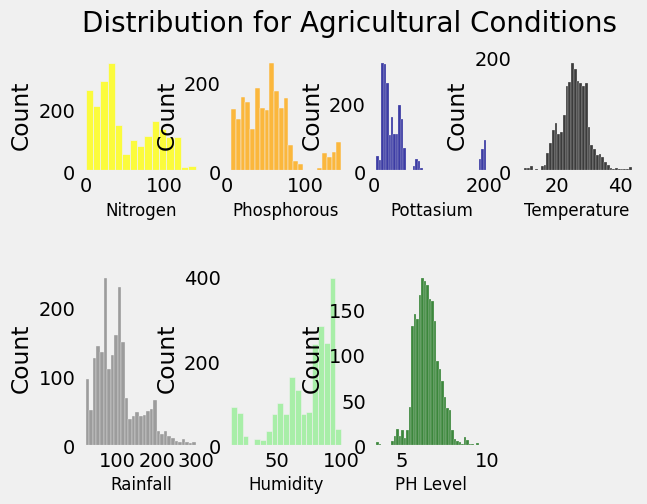

In [11]:
plt.subplot(3,4,1)
sns.histplot(data['N'], color="yellow")
plt.xlabel('Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(3,4,2)
sns.histplot(data['P'], color="orange")
plt.xlabel('Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(3,4,3)
sns.histplot(data['K'], color="darkblue")
plt.xlabel('Pottasium', fontsize = 12)
plt.grid()

plt.subplot(3,4,4)
sns.histplot(data['temperature'], color="black")
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2,4,5)
sns.histplot(data['rainfall'], color="grey")
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.histplot(data['humidity'], color="lightgreen")
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2,4,7)
sns.histplot(data['ph'], color="darkgreen")
plt.xlabel('PH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()

In [12]:
#Checking that crops those have unusual requirements

print("Some Interesting Patterns")
print("...........................................")
print("Crops that require very High Ratio of Nitrogen Content in Soil:", data[data['N'] > 120]['label'].unique())
print("Crops that require very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique())
print("Crops that require very High Ratio of Potassium Content in Soil:", data[data['K'] > 200]['label'].unique())
print("Crops that require very High Rainfall:", data[data['rainfall'] > 200]['label'].unique())
print("Crops that require very Low Temperature:", data[data['temperature'] < 10]['label'].unique())
print("Crops that require very High Temperature:", data[data['temperature'] > 40]['label'].unique())
print("Crops that require very Low Humidity:", data[data['humidity'] < 20]['label'].unique())
print("Crops that require very Low pH:", data[data['ph'] < 4]['label'].unique())
print("Crops that require very High pH:", data[data['ph'] > 9]['label'].unique())

Some Interesting Patterns
...........................................
Crops that require very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops that require very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops that require very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops that require very High Rainfall: ['rice' 'papaya' 'coconut']
Crops that require very Low Temperature: ['grapes']
Crops that require very High Temperature: ['grapes' 'papaya']
Crops that require very Low Humidity: ['chickpea' 'kidneybeans']
Crops that require very Low pH: ['mothbeans']
Crops that require very High pH: ['mothbeans']


In [13]:
#Checking which crop to be grown according to the season

print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("...........................................")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("...........................................")
print("Monsoon Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
...........................................
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
...........................................
Monsoon Crops
['rice' 'papaya' 'coconut']


In [14]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

### Clustering Similar Crops

In [15]:
### Lets try to cluster these crops

# Lets import the warnings library so that we can avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Lets select all the columns from the data
x = data.loc[:,['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].values

# Lets check the shape of x
print(x.shape)

# Lets convert this data into a dataframe
x_data = pd.DataFrame(x)
x_data.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340


<function matplotlib.pyplot.show(close=None, block=None)>

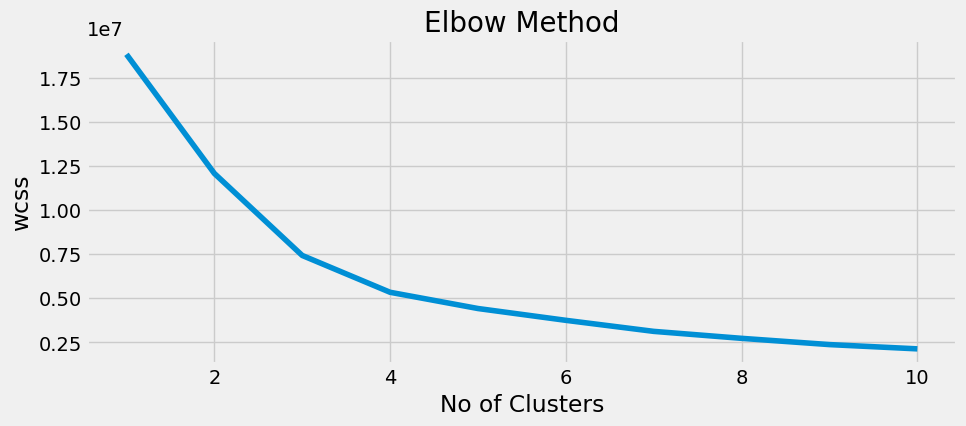

In [16]:
# Lets determine the optimum number of clusters within the Dataset
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

# Lets plot the results

plt.plot(range(1,11), wcss)
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show

In [17]:
#Implementation of K Means algorithm to perform Clustering analysis

km = KMeans(n_clusters = 4, init = 'k-means++',  max_iter = 2000, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

#Finding the results
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

#Checking the clusters for each crop
print("Lets Check the results after applying K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("...........................................")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("...........................................")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("...........................................")
print("Crops in Fourth Cluster:", z[z['cluster'] == 3]['label'].unique())

Lets Check the results after applying K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
...........................................
Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
...........................................
Crops in Third Cluster: ['grapes' 'apple']
...........................................
Crops in Fourth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [41]:
# Visualising Hidden Paterns



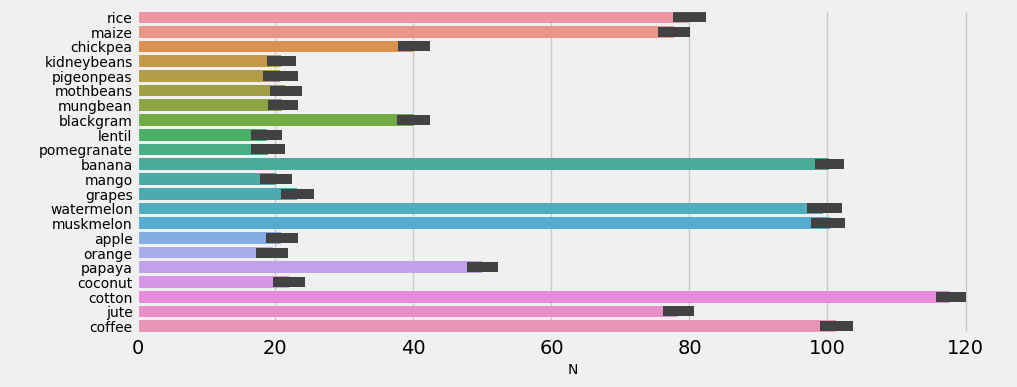

In [42]:
sns.barplot(x=data['N'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('N',fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

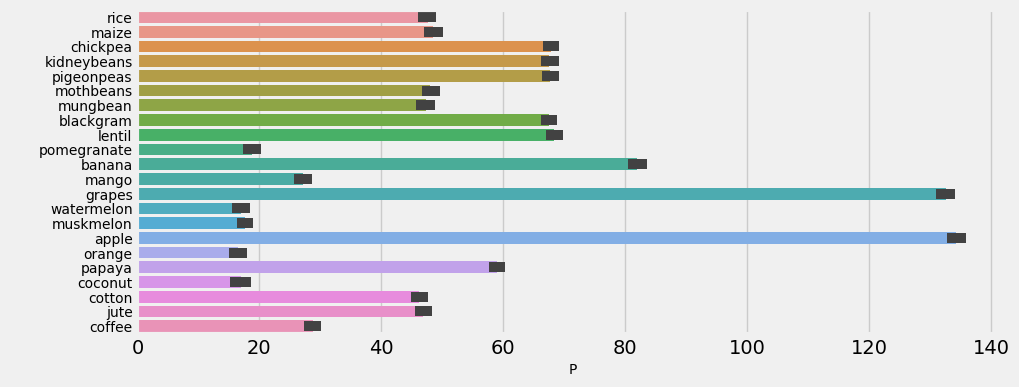

In [43]:
sns.barplot(x=data['P'],y=data['label'])
plt.ylabel(' ')
plt.xlabel('P',fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

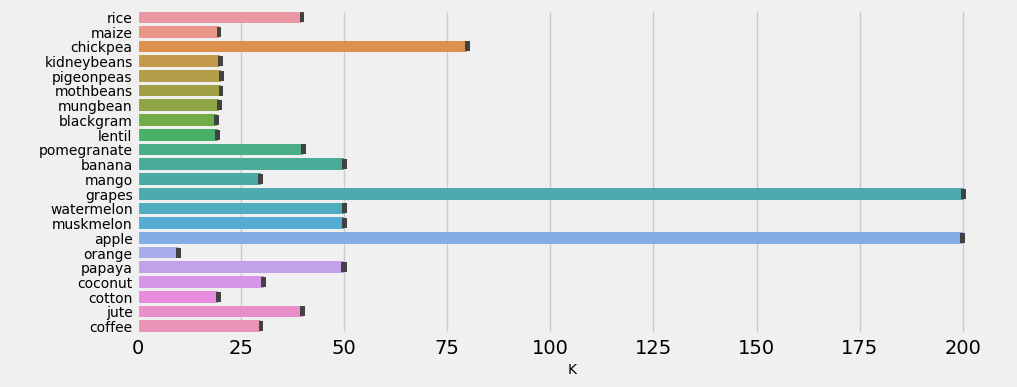

In [44]:
sns.barplot(x=data['K'],y=data['label'])
plt.ylabel(' ')
plt.xlabel('K',fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

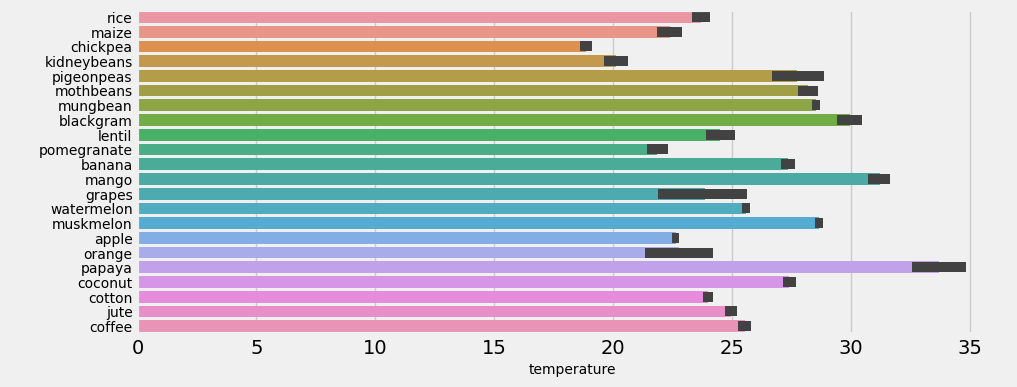

In [45]:
sns.barplot(x=data['temperature'],y=data['label'])
plt.ylabel(' ')
plt.xlabel('temperature',fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

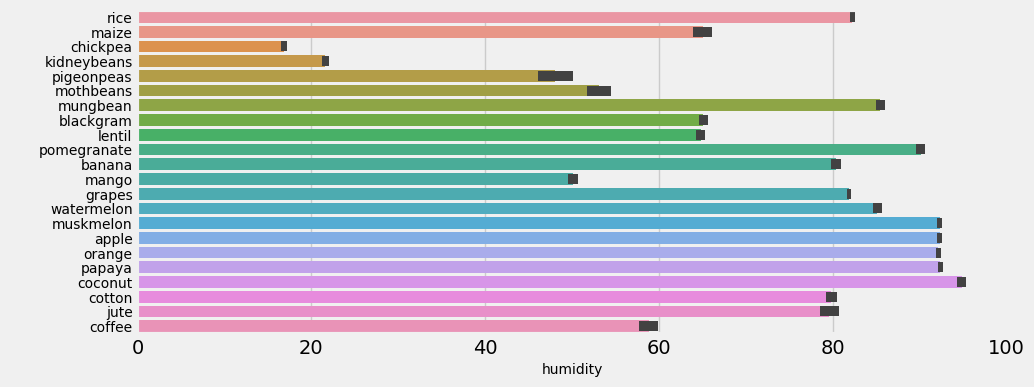

In [46]:
sns.barplot(x=data['humidity'],y=data['label'])
plt.ylabel(' ')
plt.xlabel('humidity',fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

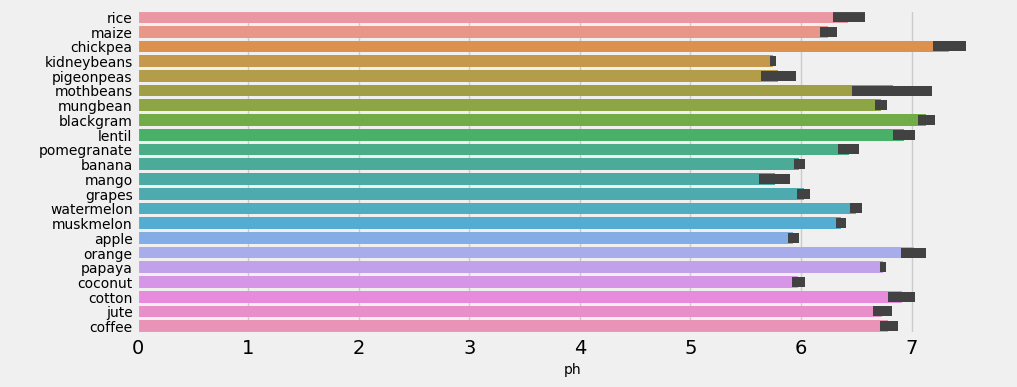

In [47]:
sns.barplot(x=data['ph'],y=data['label'])
plt.ylabel(' ')
plt.xlabel('ph',fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

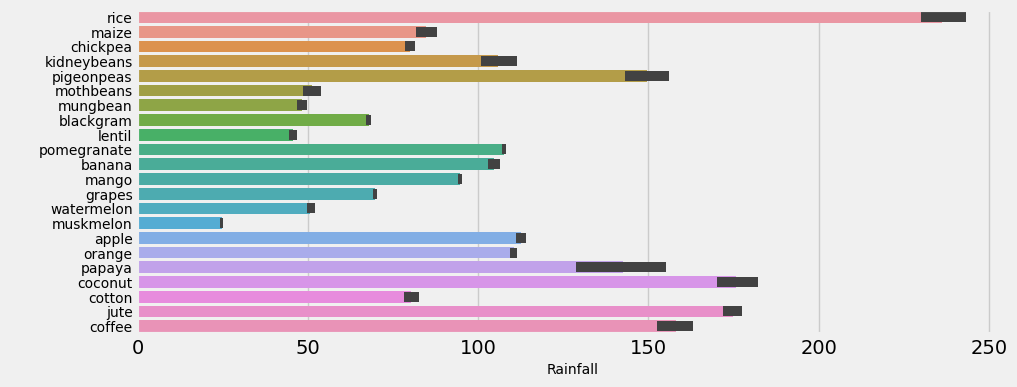

In [48]:
sns.barplot(x=data['rainfall'],y=data['label'])
plt.ylabel(' ')
plt.xlabel('Rainfall',fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [49]:
#Splitting the Dataset for predictive modelling

y = data['label']
x = data.drop(['label'], axis=1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [50]:
#Creating training and testing sets for results validation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("The Shape Of x train:", x_train.shape)
print("The Shape Of x test:", x_test.shape)
print("The Shape Of y train:", y_train.shape)
print("The Shape Of y test:", y_test.shape)

The Shape Of x train: (1760, 7)
The Shape Of x test: (440, 7)
The Shape Of y train: (1760,)
The Shape Of y test: (440,)


In [51]:
#Creating a Predictive Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

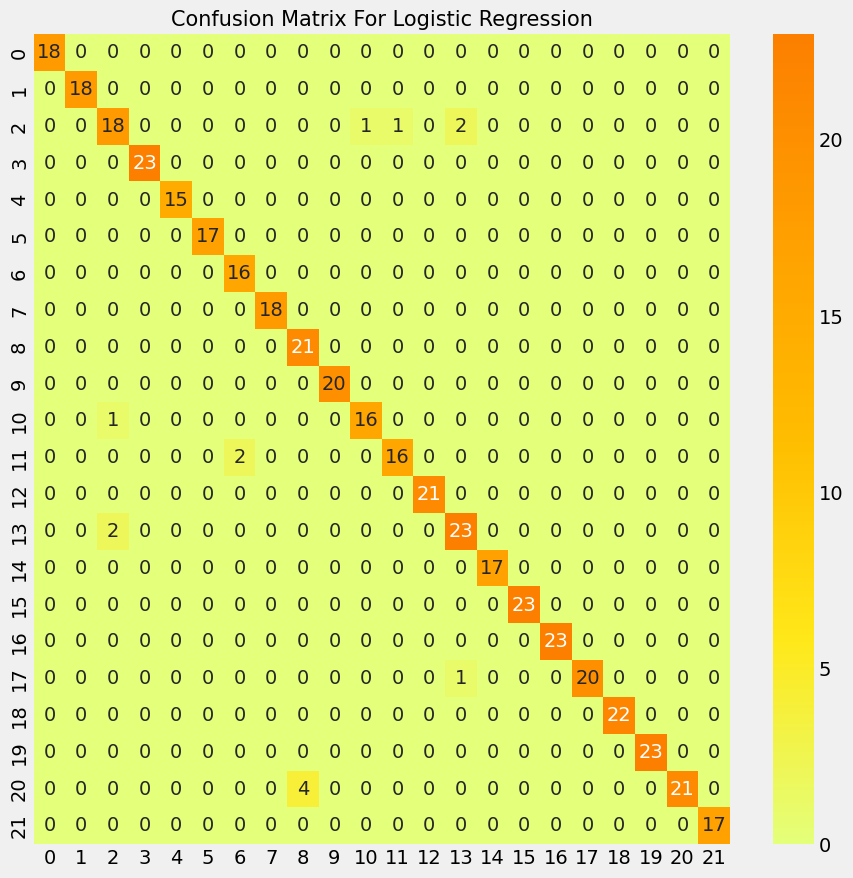

In [52]:
#Evaluating the model performance
from sklearn.metrics import confusion_matrix

#Printing the Confusing Matrix
plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix For Logistic Regression', fontsize = 15)
plt.show()

In [53]:
#Defining the classification Report
from sklearn.metrics import classification_report

#Printing the Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [54]:
#head of dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [55]:
prediction = model.predict((np.array([[90, 40, 40, 20, 80, 7, 200]])))
print("The Suggested Crop for given climatic condition is :",prediction)

The Suggested Crop for given climatic condition is : ['rice']


In [56]:
# Lets check the data for oranges
data[data['label']=='orange'].head()

,N,P,K,temperature,humidity,ph,rainfall,label
1600,22,30,12,15.781442,92.510777,6.354007,119.035002,orange
1601,37,6,13,26.030973,91.508193,7.511755,101.284774,orange
1602,27,13,6,13.360506,91.356082,7.335158,111.226688,orange
1603,7,16,9,18.879577,92.043045,7.813917,114.665951,orange
1604,20,7,9,29.477417,91.578029,7.129137,111.172750,orange


In [57]:
prediction = model.predict((np.array([[20, 30, 10, 15, 90, 7.5, 100]])))
print("The Suggested Crop for given climatic condition is :",prediction)

The Suggested Crop for given climatic condition is : ['orange']


### Summarizing Key Points
<pre>
1) We learnt about the use of statistics in summarising the major facts about the data.
2) We got general information about the conditions to be taken care of while growing different crops.
3) We learnt the use of ipywidgets to make the functions more interactive to the user.
4) We learnt about clustering analysis.
5) We learnt the difference between soft clustering and hard clustering.
6) We learnt the importance of Data Visualisation to find the hidden patterns from the data.
7) We learnt how to apply Logistics Regression to real world problems.
8) We also learnt about Evaluation Metrics used for classification problems.
</pre>